<a href="https://colab.research.google.com/github/dataByCarl/2022_datathon/blob/main/ElderNet_Client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2022 Datathon with ElderNet
<p>Client Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ls /content/gdrive/MyDrive/dataPhilly_ElderNet

care_management.csv  donations.csv  pantry_flat.csv
Client_data2.csv     pantry.csv     volunteer_services.csv


In [10]:
clientinfo=pd.read_csv('/content/gdrive/MyDrive/dataPhilly_ElderNet/Client_data2.csv')

**Client Info**
1. Look at nulls/NAs
2. Calculate split by County
3. Calculate %Total Minority
4. Calculate %Minority by Age Group
5. Calculate Count by Age Group
6. Can we use Poverty flag?

In [ ]:
# What does file look like?  Look at first three rows of data (and column labels)
clientinfo.head(3)

,anon_ID,county,poverty,minority,age_group
0,1,Montgomery,No,NaN,P
1,2,Montgomery,No,No,D
2,3,Montgomery,No,No,P


In [ ]:
# How many records per column, and what data types?
clientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anon_ID    641 non-null    int64 
 1   county     641 non-null    object
 2   poverty    601 non-null    object
 3   minority   156 non-null    object
 4   age_group  424 non-null    object
dtypes: int64(1), object(4)
memory usage: 25.2+ KB


In [ ]:
# Check for nulls
clientinfo.isnull().sum()

anon_ID        0
county         0
poverty       40
minority     485
age_group    217
dtype: int64

Missing 485 out of 641 "Minority" flags.  Throw this column out?
county not really useful, throw this out?

In [11]:
clientinfo=clientinfo.drop('minority',axis=1)

In [12]:
clientinfo=clientinfo.drop('county',axis=1)

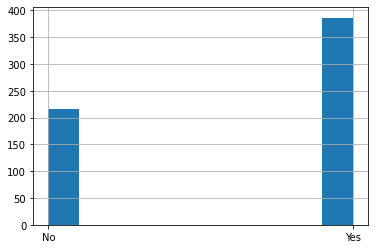

In [ ]:
clientinfo['poverty'].hist()

In [ ]:
clientinfo.pivot_table(index=['poverty'],columns=['county'], values=['anon_ID'], aggfunc=['count'])

,count
,anon_ID
county,Montgomery
poverty,
No,215
Yes,386


In [ ]:
clientinfo.pivot_table(index=['age_group'],columns=['county'], values=['anon_ID'], aggfunc=['count'])

,count
,anon_ID
county,Montgomery
age_group,
D,95
G,174
P,64
T,91


In [7]:
# A different way to aggregate, similar to pivot_table
clientinfo.groupby(['age_group'])['anon_ID'].count()

age_group
D     95
G    174
P     64
T     91
Name: anon_ID, dtype: int64

In [ ]:
clientinfo['county'].unique()

array(['Montgomery', 'Other'], dtype=object)

In [ ]:
clientinfo.pivot_table(index=['county'],columns=['age_group'], values=['anon_ID'], aggfunc=['count'])

count             
           anon_ID             
age_group        D    G   P   T
county                         
Montgomery      95  174  64  91

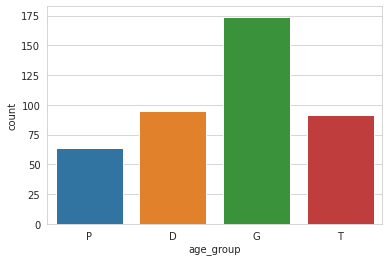

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='age_group',data=clientinfo,)

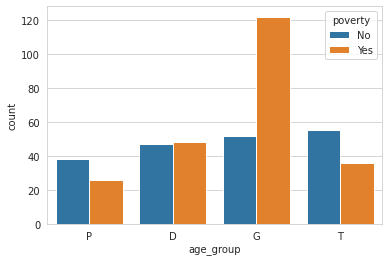

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='age_group',data=clientinfo,hue='poverty')

In [ ]:
clientinfo.groupby(['age_group','poverty'])['age_group'].count()

age_group  poverty
D          No          47
           Yes         48
G          No          52
           Yes        122
P          No          38
           Yes         26
T          No          55
           Yes         36
Name: age_group, dtype: int64

In [ ]:
clientinfo.groupby(['age_group','poverty'])['anon_ID'].count()

age_group  poverty
D          No          47
           Yes         48
G          No          52
           Yes        122
P          No          38
           Yes         26
T          No          55
           Yes         36
Name: anon_ID, dtype: int64

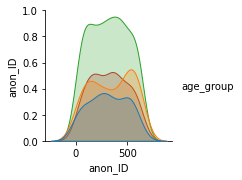

In [ ]:
sns.pairplot(clientinfo,hue='age_group')

??? How to plot count by category (e.g. count of poverty by age)???

In [ ]:
clientinfo.head()

,anon_ID,poverty,age_group
0,1,No,P
1,2,No,D
2,3,No,P
3,4,NaN,NaN
4,5,No,G


In [18]:
clientinfo.isnull().sum()

anon_ID        0
poverty       40
age_group    217
dtype: int64

After flatten, what joins make sense?

In [19]:
clientinfo.to_csv('/content/gdrive/MyDrive/dataPhilly_ElderNet/clientinfo_flat.csv')

In [9]:
# Convert the four age groups into n-1 age groups (0,0,0 implies 4th/dropped age groups)
# Stated differently, convert the text categories into integers so can apply calculations
clientinfo_final=pd.get_dummies(clientinfo,columns=['age_group'],drop_first=True)

In [ ]:
clientinfo_final.head()